## **Árvore de Decisão**
> Uma árvore de decisão é uma estrutura que recebe um vetor de atributos como entrada e retorna uma decisão única. Ela organiza a lógica de decisão de forma hierárquica, com cada nó representando um teste em um atributo. Isso permite que o processo de tomada de decisão seja transparente e de fácil interpretação.

> O processo de decisão começa na raiz da árvore, onde é feito o primeiro teste sobre um atributo. Dependendo do resultado, o caminho segue por um dos ramos até atingir uma folha, que contém a decisão final. Cada teste reduz a incerteza, fazendo com que a árvore chegue à resposta de forma eficiente.

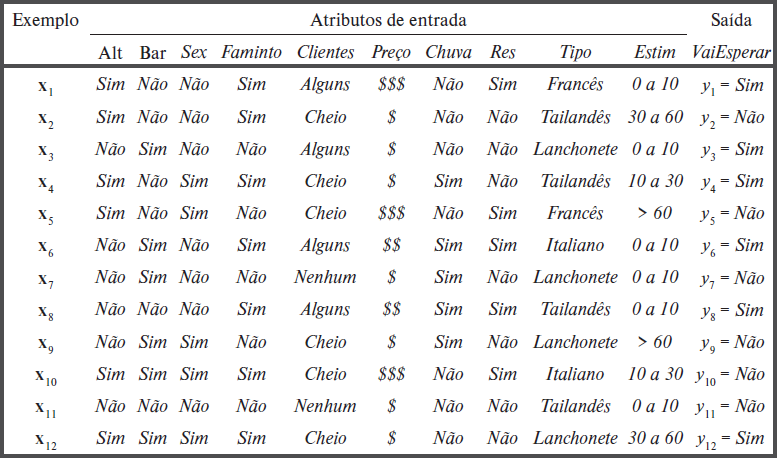

> Por exemplo, em um problema de restaurante, uma árvore de decisão pode indicar que, se o número de clientes for "Cheio" e o tempo de espera for entre 0 e 10 minutos, a decisão será "Sim, esperar pela mesa". Cada ramificação reflete uma condição específica, e a folha final fornece a classificação ou ação recomendada.

> 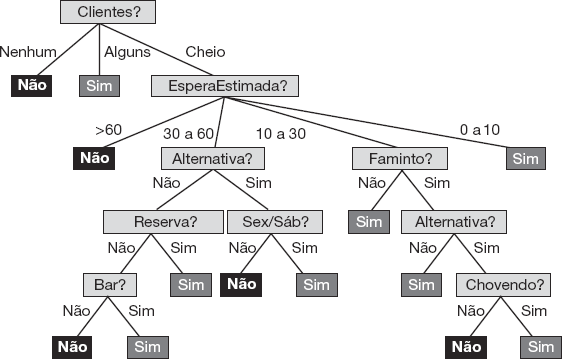

> Dessa forma, pode-se enxergar a árvore de decisão como uma representação de conjunto de regras criado para tormar qualquer decisão.

> Segue um exemplo aplicado na categorização de Iris baseado no comprimento e largura das suas petalas.

# Pacotes e Módulos

In [32]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn import tree
import matplotlib.pyplot as plt

# Dataset

In [44]:
# Dataset de Iris
data = load_iris()
iris = pd.DataFrame(data.data)
iris.columns = data.feature_names
iris['target'] = data.target

In [34]:
# Seleciona apenas amostras das classes 1 e 2 e as colunas de interesse
iris = iris.loc[
    iris['target'].isin([1, 2]),
    ['petal length (cm)', 'petal width (cm)', 'target']
]

iris

,petal length (cm),petal width (cm),target
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1
53,4.0,1.3,1
54,4.6,1.5,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [35]:
# Separando as features e o labels
X = iris.drop('target', axis = 1)
y = iris.target

In [36]:
# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

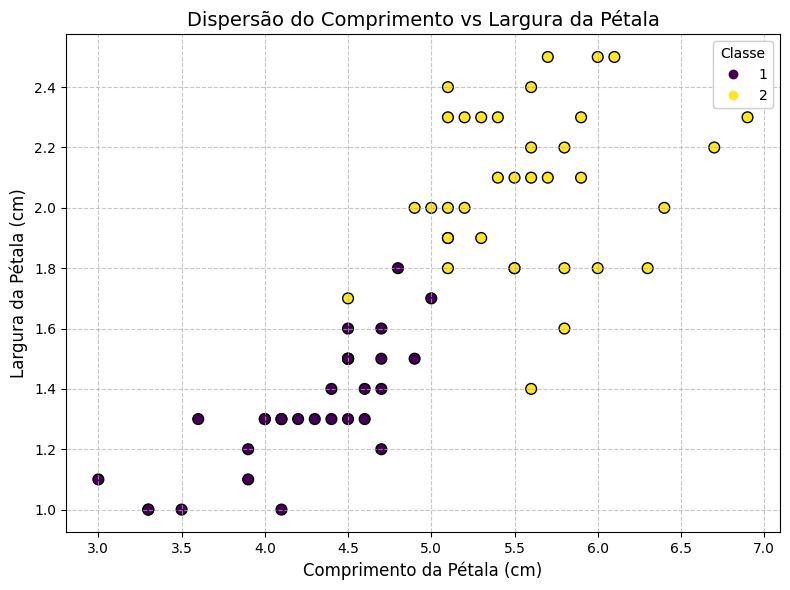

In [37]:
# Criação da figura e dos eixos
fig, ax = plt.subplots(figsize=(8, 6))  # Definimos um tamanho melhor para visualização

# Gráfico de dispersão
scatter = ax.scatter(
    X_train['petal length (cm)'],
    X_train['petal width (cm)'],
    c=y_train,
    edgecolor='k',   # Contorno nos pontos para melhor definição
    s=60             # Tamanho dos pontos
)

# Títulos e rótulos
ax.set_title('Dispersão do Comprimento vs Largura da Pétala', fontsize=14)
ax.set_xlabel('Comprimento da Pétala (cm)', fontsize=12)
ax.set_ylabel('Largura da Pétala (cm)', fontsize=12)

# Inclusão de uma legenda para as classes, 1 (Versicolor) e 2 (Virginica)
legend1 = ax.legend(*scatter.legend_elements(), title="Classe")
ax.add_artist(legend1)

# Grade para melhor leitura
ax.grid(True, linestyle='--', alpha=0.7)

# Exibição do gráfico
plt.tight_layout()
plt.show()


# Criando e treinando a Arvore

In [38]:
# Arvore de decisao
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

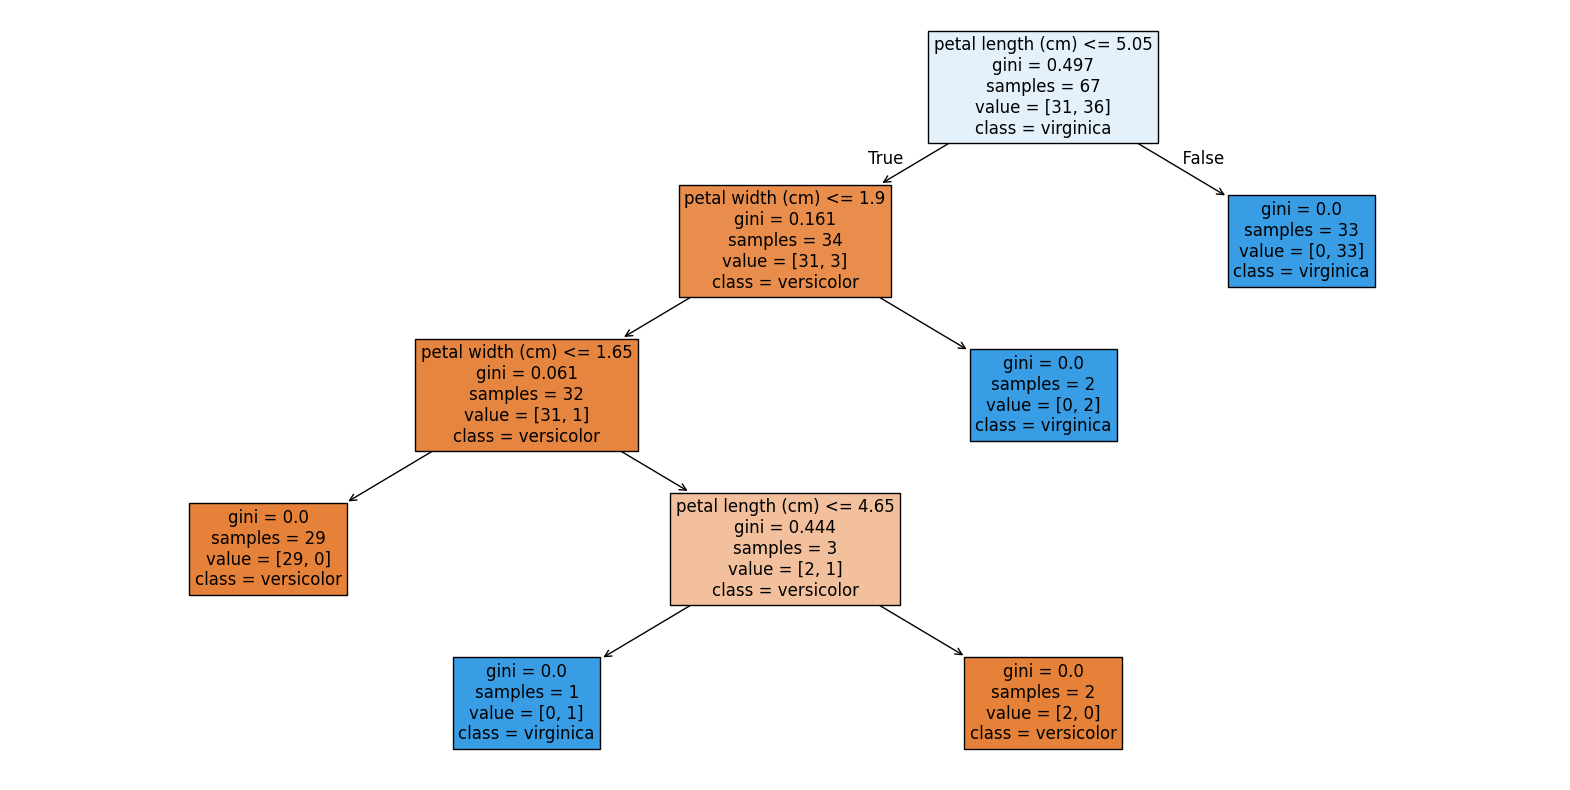

In [39]:
# Plotando a árvore de decisão com detalhes
plt.figure(figsize=(20,10))

tree.plot_tree(
    clf, 
    feature_names=['petal length (cm)', 'petal width (cm)'],  # Nome das features usadas
    class_names=['versicolor', 'virginica'],                  # Nomes das classes (Target)
    filled=True,                                              # Preenche os nós com cores baseadas na classe
    fontsize=12                                               # Tamanho da fonte
)

# Exibe o gráfico
plt.show()

# Gráficos e Métricas

- Plotando a disposição dos dados de Treino nos parametros adotados pela arvore

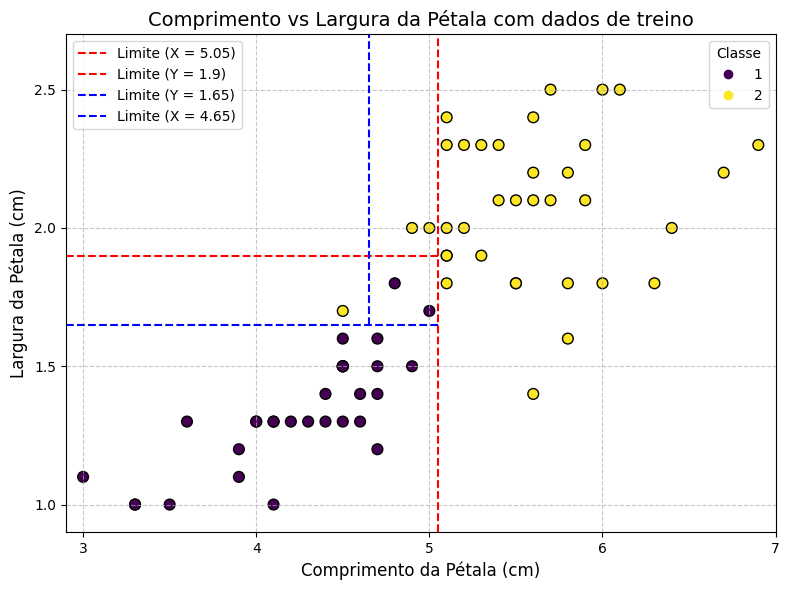

In [40]:
# Criação da figura e eixo
fig, ax = plt.subplots(figsize=(8, 6))

# Gráfico de dispersão
scatter = ax.scatter(
    X_train['petal length (cm)'],
    X_train['petal width (cm)'],
    c=y_train,
    cmap='viridis',
    edgecolor='k',
    s=60
)

# Configuração dos limites e marcações dos eixos
ax.set(
    xlim=(2.9, 7.0), xticks=[3, 4, 5, 6, 7],
    ylim=(0.9, 2.7), yticks=[1.0, 1.5, 2.0, 2.5]
)

# Adicionando as linhas de decisão
ax.plot([5.05, 5.05], [0.9, 2.7], linestyle='--', color='red', label='Limite (X = 5.05)')
ax.plot([2.9, 5.05], [1.9, 1.9], linestyle='--', color='red', label='Limite (Y = 1.9)')
ax.plot([2.9, 5.05], [1.65, 1.65], linestyle='--', color='blue', label='Limite (Y = 1.65)')
ax.plot([4.65, 4.65], [1.65, 2.7], linestyle='--', color='blue', label='Limite (X = 4.65)')

# Títulos e rótulos
ax.set_title('Comprimento vs Largura da Pétala com dados de treino', fontsize=14)
ax.set_xlabel('Comprimento da Pétala (cm)', fontsize=12)
ax.set_ylabel('Largura da Pétala (cm)', fontsize=12)

# Inclusão de uma legenda para as classes, 1 (Versicolor) e 2 (Virginica)
legend1 = ax.legend(*scatter.legend_elements(), title="Classe")
ax.add_artist(legend1)

# Adiciona grade
ax.grid(True, linestyle='--', alpha=0.7)

# Legenda (evitando duplicatas)
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='best', fontsize=10)

# Ajuste automático
plt.tight_layout()
plt.show()

---
- Plotando a disposição dos dados de Teste nos parametros adotados pela arvore

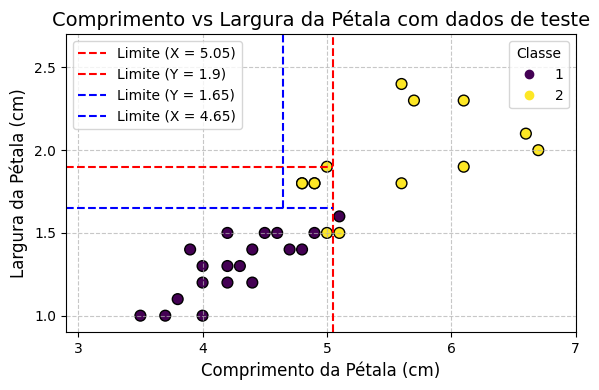

In [41]:
# Criação da figura e eixo
fig, ax = plt.subplots(figsize=(6, 4))

# Gráfico de dispersão
scatter = ax.scatter(
    X_test['petal length (cm)'],
    X_test['petal width (cm)'],
    c=y_test,
    cmap='viridis',
    edgecolor='k',
    s=60
)

# Configuração dos limites e marcações dos eixos
ax.set(
    xlim=(2.9, 7.0), xticks=[3, 4, 5, 6, 7],
    ylim=(0.9, 2.7), yticks=[1.0, 1.5, 2.0, 2.5]
)

# Adicionando as linhas de decisão
ax.plot([5.05, 5.05], [0.9, 2.7], linestyle='--', color='red', label='Limite (X = 5.05)')
ax.plot([2.9, 5.05], [1.9, 1.9], linestyle='--', color='red', label='Limite (Y = 1.9)')
ax.plot([2.9, 5.05], [1.65, 1.65], linestyle='--', color='blue', label='Limite (Y = 1.65)')
ax.plot([4.65, 4.65], [1.65, 2.7], linestyle='--', color='blue', label='Limite (X = 4.65)')

# Títulos e rótulos
ax.set_title('Comprimento vs Largura da Pétala com dados de teste', fontsize=14)
ax.set_xlabel('Comprimento da Pétala (cm)', fontsize=12)
ax.set_ylabel('Largura da Pétala (cm)', fontsize=12)

# Inclusão de uma legenda para as classes, 1 (Versicolor) e 2 (Virginica)
legend1 = ax.legend(*scatter.legend_elements(), title="Classe")
ax.add_artist(legend1)

# Adiciona grade
ax.grid(True, linestyle='--', alpha=0.7)

# Legenda (evitando duplicatas)
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='best', fontsize=10)

# Ajuste automático
plt.tight_layout()
plt.show()

- Métricas de Classificação

In [42]:
# Fazendo previsões
y_pred = clf.predict(X_test)

# Calculando e imprimindo o relatório de classificação
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           1       0.75      0.95      0.84        19
           2       0.89      0.57      0.70        14

    accuracy                           0.79        33
   macro avg       0.82      0.76      0.77        33
weighted avg       0.81      0.79      0.78        33



- Plotando a Matriz de confusão

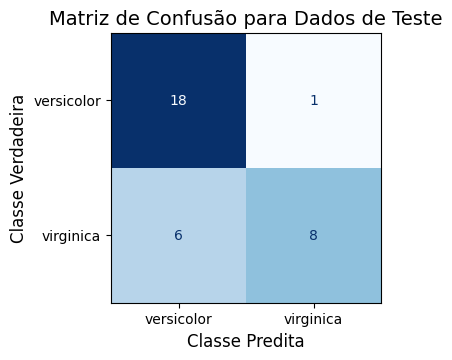

In [43]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibindo a matriz de confusão graficamente
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['versicolor', 'virginica'])
fig, ax = plt.subplots(figsize=(4, 4))
disp.plot(ax=ax, cmap='Blues', colorbar=False)

# Melhorando o gráfico
ax.set_title('Matriz de Confusão para Dados de Teste', fontsize=14)
ax.set_xlabel('Classe Predita', fontsize=12)
ax.set_ylabel('Classe Verdadeira', fontsize=12)

plt.tight_layout()
plt.show()